# Support Vector Machines (SVM) and Confusion Matrix

In [70]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [71]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


- age
- sex
- chest pain type (4 values)
- RestBP: resting blood pressure
- Chol: serum cholestoral in mg/dl
- Fbs: fasting blood sugar > 120 mg/dl
- RestECG: resting electrocardiographic results (values 0,1,2)
- MaxHR: maximum heart rate achieved
- ExAng: exercise induced angina
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment
- Ca: number of major vessels (0-3) colored by flourosopy
- thal: thalassemia normal; fixed defect; reversable defect

The target here is AHD (Acquired heart diseases)

In [72]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [73]:
df['ChestPain'].value_counts()

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [75]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [76]:
# get the average Age by AHD
df.groupby('AHD')['Age'].mean()

AHD
No     52.585366
Yes    56.625899
Name: Age, dtype: float64

In [77]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


<Axes: xlabel='Age', ylabel='Chol'>

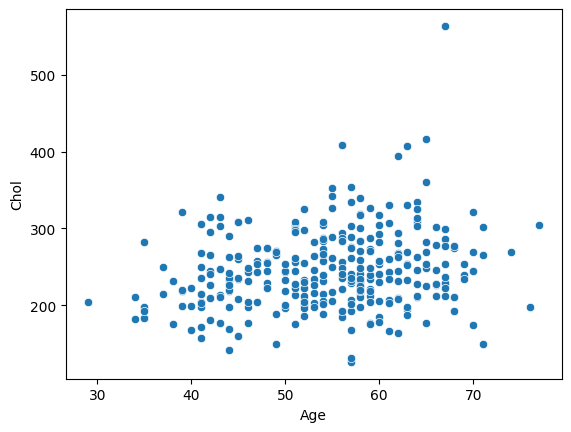

In [78]:
sns.scatterplot(x=df['Age'], y=df['Chol'])

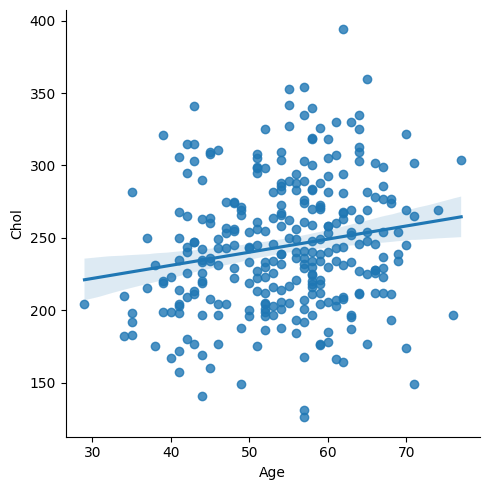

In [79]:
df_low_chol = df[df['Chol']<400]
sns.lmplot(data=df_low_chol, x='Age', y='Chol')

## Encoding

In [80]:
df_enc = pd.get_dummies(df, columns=['ChestPain', 'Thal'], dtype=int)
df_enc.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,No,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,Yes,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,Yes,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,No,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,No,0,0,1,0,0,1,0


In [81]:
df_enc['AHD'] = df_enc['AHD'].map({'Yes':1, 'No':0})
df_enc.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,1,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,1,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,0,1,0,0,1,0


### Splitting into X and y

In [82]:
X = df_enc.drop(columns='AHD', axis=1)
y = df_enc['AHD']

In [83]:
X.shape

(303, 18)

### Standardization

In [ ]:
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)
X_scaled

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

### Perform SVM (SVC)

![SVM](https://datatron.com/wp-content/uploads/2021/05/Support-Vector-Machine.png)

In [96]:
from sklearn.model_selection import GridSearchCV

SVC_Model = svm.SVC()

param_grid = {
                'C': [1,10,100,1000,2000],
                'gamma': [1,0.1, 0.01, 10, 100, 0.001, 0.0001],
                'kernel': ['rbf', 'sigmoid']
}

In [97]:
# let's deploy our GS

GS = GridSearchCV(SVC_Model, param_grid, verbose=1, cv=10)

GS_Model = GS.fit(X_train, y_train)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


In [98]:
print(GS_Model.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [99]:
accuracy = GS_Model.best_score_
accuracy

0.7806666666666666

In [100]:
y_test_pred = GS_Model.predict(X_test)

In [101]:
CM = confusion_matrix(y_test, y_test_pred)

In [102]:
CM

array([[25,  3],
       [ 7, 26]])

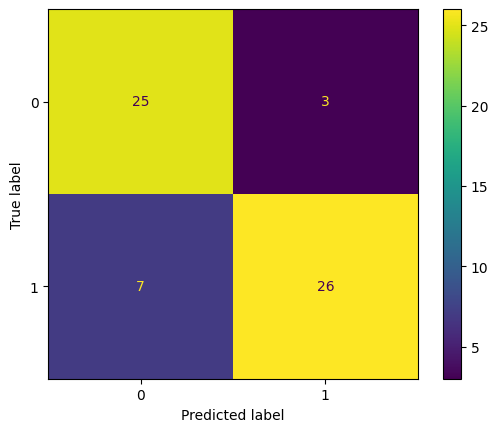

In [103]:
CM_disp = ConfusionMatrixDisplay(confusion_matrix=CM)
CM_disp.plot()

- After running another round of hyper parameter tuning, we got much better results in the conf matrix and accuracy
- There are 9 cases where the model mis-classified Yes for heart disease for No.
- We want this number to be as low as possible to make sure the patient predicted to have heart disease get proper medical attention

In [104]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



- Precision is gonna help me understand how the model correctly predicted positive observations from total predicted positives